# Loading the Data

In [ ]:
from google.colab import files
upload = files.upload()

! unzip data.zip

Saving data.zip to data.zip
Archive:  data.zip
  inflating: .DS_Store               
  inflating: set_a.csv               
  inflating: set_a/artifact__201012172012.wav  
  inflating: set_a/artifact__201105040918.wav  
  inflating: set_a/artifact__201105041959.wav  
  inflating: set_a/artifact__201105051017.wav  
  inflating: set_a/artifact__201105060108.wav  
  inflating: set_a/artifact__201105061143.wav  
  inflating: set_a/artifact__201105190800.wav  
  inflating: set_a/artifact__201105280851.wav  
  inflating: set_a/artifact__201106010559.wav  
  inflating: set_a/artifact__201106010602.wav  
  inflating: set_a/artifact__201106021541.wav  
  inflating: set_a/artifact__201106030612.wav  
  inflating: set_a/artifact__201106031558.wav  
  inflating: set_a/artifact__201106040722.wav  
  inflating: set_a/artifact__201106040933.wav  
  inflating: set_a/artifact__201106040947.wav  
  inflating: set_a/artifact__201106041452.wav  
  inflating: set_a/artifact__201106050353.wav  
  inflating: 

# Importing the required libraries for data exploration

In [ ]:
import os
import shutil
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt


In [ ]:
# Load the CSV Files
data_a_csv = pd.read_csv('/content/set_a.csv')
data_b_csv = pd.read_csv('/content/set_b.csv')

# Define directories
data_a_dir = "/content/set_a"
data_b_dir = "/content/set_b"
test_data_dir = "/content/test_data"

# Create a new directory for test data
if not os.path.exists(test_data_dir):
    os.makedirs(test_data_dir)

def segregate_data(data_dir):
    """Move unlabeled test data to a separate folder."""
    for filename in os.listdir(data_dir):
        file_path = os.path.join(data_dir, filename)
        if "Aunlabelledtest" in filename or "Bunlabelledtest" in filename:
            # Move the file to the test data directory
            shutil.move(file_path, os.path.join(test_data_dir, filename))

# Segregate data from both directories
segregate_data(data_a_dir)
segregate_data(data_b_dir)

print(f"Unlabelled data moved to {test_data_dir}")

# List the number of files for each category in both datasets
def list_files(directory):
    return [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

print("Dataset A files:", list_files(data_a_dir))
print("Dataset B files:", list_files(data_b_dir))

Unlabelled data moved to /content/test_data
Dataset A files: ['murmur__201108222237.wav', 'artifact__201106010602.wav', 'normal__201105151450.wav', 'artifact__201106040933.wav', 'normal__201102260502.wav', 'murmur__201108222226.wav', 'murmur__201104241315.wav', 'artifact__201106040947.wav', 'murmur__201106141148.wav', 'artifact__201105060108.wav', 'murmur__201108222231.wav', 'normal__201104122156.wav', 'artifact__201106131834.wav', 'normal__201103140135.wav', 'artifact__201106211041.wav', 'murmur__201108222223.wav', 'artifact__201105061143.wav', 'murmur__201108222233.wav', 'extrahls__201102241217.wav', 'normal__201108011114.wav', 'murmur__201104021355.wav', 'extrahls__201101160808.wav', 'normal__201102081152.wav', 'artifact__201106070537.wav', 'extrahls__201104270459.wav', 'murmur__201108222221.wav', 'artifact__201106041452.wav', 'normal__201101070538.wav', 'artifact__201106221254.wav', 'normal__201102270940.wav', 'murmur__201104291843.wav', 'artifact__201106220340.wav', 'murmur__20110

# Displaying Waveform,MFCCs,Spectogram,Chromogram,Spectral Contrast

In [ ]:
import librosa
import librosa.display
import numpy as np
import os
import matplotlib.pyplot as plt

# Extract features from audio files
def extract_features(audio_file):
    y, sr = librosa.load(audio_file, sr=None)

    # MFCCs with 20 coefficients
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

    # Chroma with 12 coefficients
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)

    # Melspectrogram with 128 coefficients
    mel = librosa.feature.melspectrogram(y=y, sr=sr)

    # Spectral Contrast with 7 coefficients
    contrast = librosa.feature.spectral_contrast(y=y, sr=sr, fmin=50.0)

    return np.hstack((np.mean(mfccs, axis=1),
                      np.mean(chroma, axis=1),
                      np.mean(mel, axis=1),
                      np.mean(contrast, axis=1)))

def extract_mfcc(audio_file):
    y, sr = librosa.load(audio_file, sr=None)
    return librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20), sr

# Sample feature visualization
sample_file = os.path.join(data_a_dir, os.listdir(data_a_dir)[0])
mfcc_features, sr = extract_mfcc(sample_file)



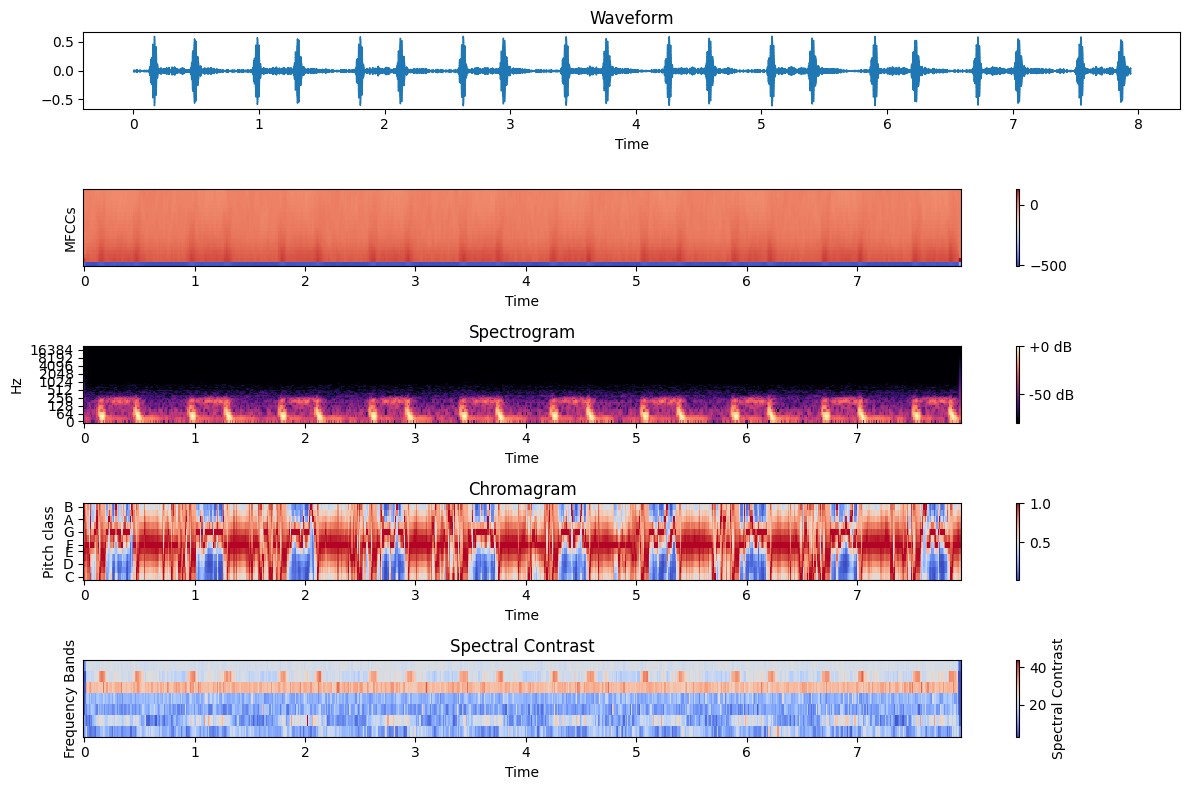

In [ ]:
# 1. Waveform
y, sr = librosa.load(sample_file, sr=None)
plt.figure(figsize=(12, 8))

# Waveform
plt.subplot(5, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.tight_layout()

# MFCCs (already plotted in your provided code)
plt.subplot(5, 1, 2)
librosa.display.specshow(mfcc_features, sr=sr, x_axis='time')
plt.colorbar()
plt.ylabel('MFCCs')
plt.tight_layout()

# 3. Spectrogram
plt.subplot(5, 1, 3)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()

# 4. Chromagram
plt.subplot(5, 1, 4)
chromagram = librosa.feature.chroma_stft(y=y, sr=sr)
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', sr=sr, cmap='coolwarm')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

# 5. Spectral Contrast
plt.subplot(5, 1, 5)
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
librosa.display.specshow(spectral_contrast, x_axis='time', sr=sr, cmap='coolwarm')
plt.colorbar(label='Spectral Contrast')
plt.ylabel('Frequency Bands')
plt.title('Spectral Contrast')
plt.tight_layout()

plt.show()


### added some extra features here.

In [ ]:
def modified_extract_features(audio_file):
    y, sr = librosa.load(audio_file, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    mel = librosa.feature.melspectrogram(y=y, sr=sr)
    contrast = librosa.feature.spectral_contrast(y=y, sr=sr, n_bands=5, fmin=100.0)
    tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
    return np.hstack((np.mean(mfccs, axis=1), np.mean(chroma, axis=1), np.mean(mel, axis=1), np.mean(contrast, axis=1), np.mean(tonnetz, axis=1)))


# Extracting the audio features for the files and Organizing them according to the labels


In [ ]:
from collections import defaultdict, Counter

X = []  # Features
y = []  # Labels

unknown_files = []  # List to store filenames with 'unknown' label
label_file_dict = defaultdict(list)

# Extract features from Dataset A
for filename in os.listdir(data_a_dir):
    if filename.endswith('.wav'):
        feature_vector = extract_features(os.path.join(data_a_dir, filename))
        X.append(feature_vector)

        full_filename = os.path.join("set_a", filename)
        if full_filename in data_a_csv['fname'].values:
            label = data_a_csv[data_a_csv['fname'] == full_filename]['label'].values[0]
            y.append(label)
            label_file_dict[label].append(full_filename)
        else:
            y.append('unknown')  # Default label this is not present in the CSV file.
            unknown_files.append(full_filename)

# Extract features from Dataset B
for filename in os.listdir(data_b_dir):
    if filename.endswith('.wav'):
        feature_vector = extract_features(os.path.join(data_b_dir, filename))
        X.append(feature_vector)

        full_filename = os.path.join("set_b", filename)
        if full_filename in data_b_csv['fname'].values:
            row = data_b_csv[data_b_csv['fname'] == full_filename]
            if pd.notna(row['sublabel'].values[0]):
                label = row['sublabel'].values[0]
            else:
                label = row['label'].values[0]
            y.append(label)
            label_file_dict[label].append(full_filename)
        else:
            y.append('unknown')
            unknown_files.append(full_filename)

X = np.array(X)
y = np.array(y)

print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")

# Print files for each label:
for label, files in label_file_dict.items():
    print(f"\nFiles for label '{label}':")
    for file in files:
        print(file)

labels_count = Counter(y)
print(labels_count)


/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Features shape: (585, 167)
Labels shape: (585,)

Files for label 'murmur':
set_a/murmur__201108222237.wav
set_a/murmur__201108222226.wav
set_a/murmur__201104241315.wav
set_a/murmur__201106141148.wav
set_a/murmur__201108222231.wav
set_a/murmur__201108222223.wav
set_a/murmur__201108222233.wav
set_a/murmur__201104021355.wav
set_a/murmur__201108222221.wav
set_a/murmur__201104291843.wav
set_a/murmur__201108222242.wav
set_a/murmur__201108222251.wav
set_a/murmur__201108222252.wav
set_a/murmur__201108222245.wav
set_a/murmur__201102051443.wav
set_a/murmur__201108222258.wav
set_a/murmur__201108222255.wav
set_a/murmur__201103291548.wav
set_a/murmur__201108222227.wav
set_a/murmur__201108222253.wav
set_a/murmur__201108222236.wav
set_a/murmur__201108222235.wav
set_a/murmur__201108222256.wav
set_a/murmur__201108222232.wav
set_a/murmur__201102052338.wav
set_a/murmur__201101180902.wav
set_a/murmur__201108222238.wav
set_a/murmur__201108222243.wav
set_a/murmur__201101051114.wav
set_a/murmur__201101051104

### Here i have organized some unknow files according to there file names.

In [ ]:
def extract_label_from_filename(file_path):
    filename = file_path.split('/')[-1]

    if "extrastole" in filename:
        return "extrahls"
    elif "murmur" in filename or "murmur_noisymurmur" in filename:
        return "murmur"
    elif "normal" in filename or "normal_noisynormal" in filename:
        return "normal"
    else:
        return "unknown"

# Update labels for files in unknown_files based on their filenames
for file in unknown_files:
    label_from_filename = extract_label_from_filename(file)
    idx = np.where(y == "unknown")[0][0]  # Find the first index with 'unknown' label
    y[idx] = label_from_filename
      # Update the label_file_dict
    label_file_dict[label_from_filename].append(file)

# If you want to verify:
unknown_count = np.sum(y == "unknown")
print(f"Number of samples still labeled as 'unknown': {unknown_count}")

for label, files in label_file_dict.items():
    print(f"\nFiles for label '{label}':")
    for file in files:
        print(file)

Number of samples still labeled as 'unknown': 0

Files for label 'murmur':
set_a/murmur__201108222237.wav
set_a/murmur__201108222226.wav
set_a/murmur__201104241315.wav
set_a/murmur__201106141148.wav
set_a/murmur__201108222231.wav
set_a/murmur__201108222223.wav
set_a/murmur__201108222233.wav
set_a/murmur__201104021355.wav
set_a/murmur__201108222221.wav
set_a/murmur__201104291843.wav
set_a/murmur__201108222242.wav
set_a/murmur__201108222251.wav
set_a/murmur__201108222252.wav
set_a/murmur__201108222245.wav
set_a/murmur__201102051443.wav
set_a/murmur__201108222258.wav
set_a/murmur__201108222255.wav
set_a/murmur__201103291548.wav
set_a/murmur__201108222227.wav
set_a/murmur__201108222253.wav
set_a/murmur__201108222236.wav
set_a/murmur__201108222235.wav
set_a/murmur__201108222256.wav
set_a/murmur__201108222232.wav
set_a/murmur__201102052338.wav
set_a/murmur__201101180902.wav
set_a/murmur__201108222238.wav
set_a/murmur__201108222243.wav
set_a/murmur__201101051114.wav
set_a/murmur__201101051104

In [ ]:
print(np.unique(y))
from collections import Counter
labels_count = Counter(y)
print(labels_count)

['artifact' 'extrahls' 'murmur' 'normal']
Counter({'normal': 351, 'murmur': 129, 'extrahls': 65, 'artifact': 40})


### Spliting the data for training and validation

In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training features shape: {X_train.shape}")
print(f"Validation features shape: {X_val.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Validation labels shape: {y_val.shape}")

Training features shape: (468, 167)
Validation features shape: (117, 167)
Training labels shape: (468,)
Validation labels shape: (117,)


# LSTM Model

### basic model for understanding

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2

# Define model parameters
input_shape = (X_train.shape[1], 1)
num_classes = len(np.unique(y_train))

# Adjusted LSTM layers with 'tanh' activation
model = Sequential()

# First Bidirectional LSTM layer with L2 regularization
model.add(Bidirectional(LSTM(64, return_sequences=True, activation='tanh', kernel_regularizer=l2(0.001)), input_shape=input_shape))
model.add(Dropout(0.5))
model.add(BatchNormalization())

# Second Bidirectional LSTM layer with L2 regularization
model.add(Bidirectional(LSTM(64, return_sequences=True, activation='tanh', kernel_regularizer=l2(0.001))))
model.add(Dropout(0.5))
model.add(BatchNormalization())

# Third LSTM layer
model.add(LSTM(64, activation='tanh'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

# Dense output layer
model.add(Dense(num_classes, activation='softmax'))


In [ ]:
# Gradient clipping in optimizer
optimizer = Adam(clipnorm=1.0, learning_rate=0.001)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

In [ ]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 29.2 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_val_encoded = encoder.transform(y_val)

from keras_tuner import HyperModel
from keras_tuner.tuners import RandomSearch

Using TensorFlow backend


In [ ]:
print(np.unique(y))


['artifact' 'extrahls' 'murmur' 'normal']


### Enhanced model

In [ ]:
class EnhancedLSTMHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        model = Sequential()

        # First Bidirectional LSTM layer with L2 regularization
        model.add(Bidirectional(LSTM(units=hp.Int('lstm_units_1', min_value=64, max_value=256, step=32, default=128),
                                         return_sequences=True,
                                         activation='tanh',
                                         kernel_regularizer=l2(hp.Choice('l2_1', values=[0.01, 0.001, 0.0001]))),
                                input_shape=self.input_shape))
        model.add(Dropout(rate=hp.Float('dropout_1', 0.1, 0.5, step=0.1, default=0.3)))
        model.add(BatchNormalization())

        # Second Bidirectional LSTM layer with L2 regularization
        model.add(Bidirectional(LSTM(units=hp.Int('lstm_units_2', min_value=64, max_value=256, step=32, default=128),
                                         return_sequences=True,
                                         activation='tanh',
                                         kernel_regularizer=l2(hp.Choice('l2_2', values=[0.01, 0.001, 0.0001])))))
        model.add(Dropout(rate=hp.Float('dropout_2', 0.1, 0.5, step=0.1, default=0.3)))
        model.add(BatchNormalization())

        # Third LSTM layer
        model.add(LSTM(units=hp.Int('lstm_units_3', min_value=32, max_value=128, step=16, default=64), activation='tanh'))
        model.add(Dropout(rate=hp.Float('dropout_3', 0.1, 0.5, step=0.1, default=0.3)))
        model.add(BatchNormalization())

        # Dense output layer
        model.add(Dense(self.num_classes, activation='softmax'))

        # Gradient clipping in optimizer
        optimizer = Adam(
            learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]),
            clipnorm=hp.Choice('clipnorm', values=[0.5, 1.0])
        )

        model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

# Using Random Search for the LSTM

In [ ]:
hypermodel = EnhancedLSTMHyperModel(input_shape=input_shape, num_classes=num_classes)

# Using RandomSearch for hyperparameter tuning
tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=25,
    executions_per_trial=1,
    directory='my_dir',
    project_name='heart_sound_classification'
)

# Start the search for the best hyperparameters
tuner.search(X_train, y_train_encoded, epochs=50, validation_data=(X_val, y_val_encoded), callbacks=[ReduceLROnPlateau(), EarlyStopping(patience=10)])

Trial 25 Complete [00h 00m 35s]
val_accuracy: 0.5555555820465088

Best val_accuracy So Far: 0.6837607026100159
Total elapsed time: 00h 20m 54s


In [ ]:
# Getting the best model
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best LSTM Units 1: ", best_hyperparameters.get('lstm_units_1'))
print("Best Dropout Rate 1: ", best_hyperparameters.get('dropout_1'))
print("Best LSTM Units 2: ", best_hyperparameters.get('lstm_units_2'))
print("Best Dropout Rate 2: ", best_hyperparameters.get('dropout_2'))
print("Best LSTM Units 3: ", best_hyperparameters.get('lstm_units_3'))
print("Best Dropout Rate 3: ", best_hyperparameters.get('dropout_3'))
print("Best Learning Rate: ", best_hyperparameters.get('learning_rate'))


Best LSTM Units 1:  224
Best Dropout Rate 1:  0.2
Best LSTM Units 2:  128
Best Dropout Rate 2:  0.1
Best LSTM Units 3:  112
Best Dropout Rate 3:  0.1
Best Learning Rate:  0.001


In [ ]:
# Train the best model
history = best_model.fit(X_train, y_train_encoded, epochs=100, validation_data=(X_val, y_val_encoded))


Epoch 1/200
15/15 [==============================] - 15s 226ms/step - loss: 0.9346 - accuracy: 0.7030 - val_loss: 1.1407 - val_accuracy: 0.6154
Epoch 2/200
15/15 [==============================] - 1s 61ms/step - loss: 0.9542 - accuracy: 0.6944 - val_loss: 1.1376 - val_accuracy: 0.5897
Epoch 3/200
15/15 [==============================] - 1s 49ms/step - loss: 0.9250 - accuracy: 0.7009 - val_loss: 1.0143 - val_accuracy: 0.6581
Epoch 4/200
15/15 [==============================] - 1s 50ms/step - loss: 0.9245 - accuracy: 0.7073 - val_loss: 1.0367 - val_accuracy: 0.6838
Epoch 5/200
15/15 [==============================] - 1s 49ms/step - loss: 0.9696 - accuracy: 0.6987 - val_loss: 1.3675 - val_accuracy: 0.5214
Epoch 6/200
15/15 [==============================] - 1s 57ms/step - loss: 0.9751 - accuracy: 0.6752 - val_loss: 1.1787 - val_accuracy: 0.6325
Epoch 7/200
15/15 [==============================] - 1s 49ms/step - loss: 0.9599 - accuracy: 0.7009 - val_loss: 1.4096 - val_accuracy: 0.5128
Epoc

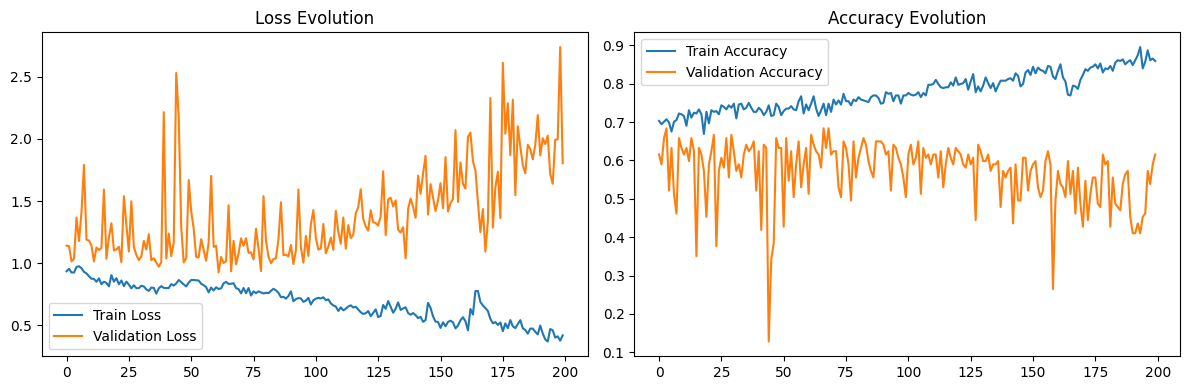

In [ ]:
# Visualizing training loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.tight_layout()
plt.show()

# Predicting on test data.

In [ ]:
test_data_dir = "/content/test_data"
# 1. Feature Extraction for Test Data:
X_test = []

for filename in os.listdir(test_data_dir):
    if filename.endswith('.wav'):
        feature_vector = extract_features(os.path.join(test_data_dir, filename))
        X_test.append(feature_vector)

X_test = np.array(X_test)

# Reshape if needed, example for LSTM:
X_test_re = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 2. Model Prediction:
y_pred_encoded = best_model.predict(X_test_re)  # this will give probabilities
y_pred = np.argmax(y_pred_encoded, axis=1)  # this will give class labels

# 3. Decode Predicted Labels:
y_pred_decoded = encoder.inverse_transform(y_pred)

# Analyze the distribution of predicted labels:
from collections import Counter
label_distribution = Counter(y_pred_decoded)

print(label_distribution)


/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


8/8 [==============================] - 3s 30ms/step
Counter({'normal': 203, 'murmur': 26, 'artifact': 15, 'extrahls': 3})


# RNN Model

In [ ]:
from tensorflow.keras.layers import SimpleRNN
from keras_tuner import HyperModel

class RNNHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        model = Sequential()

        model.add(SimpleRNN(units=hp.Int('units_1',
                                   min_value=32,
                                   max_value=256,
                                   step=32,
                                   default=128),
                       activation='relu',
                       return_sequences=True,
                       input_shape=self.input_shape))

        model.add(Dropout(rate=hp.Float('dropout_1',
                                        min_value=0.1,
                                        max_value=0.5,
                                        step=0.1,
                                        default=0.25)))

        model.add(SimpleRNN(units=hp.Int('units_2',
                                   min_value=32,
                                   max_value=256,
                                   step=32,
                                   default=128),
                       activation='relu'))

        model.add(Dropout(rate=hp.Float('dropout_2',
                                        min_value=0.1,
                                        max_value=0.5,
                                        step=0.1,
                                        default=0.25)))

        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate',
                      values=[1e-2, 1e-3, 1e-4])),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

        return model

rnn_hypermodel = RNNHyperModel(input_shape=X_train[0].shape, num_classes=num_classes)


In [ ]:
# Step 1: Hyperparameter Search
tuner = RandomSearch(
    rnn_hypermodel,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='rnn_tuner',
    project_name='rnn_hyper_tuning'
)

# Step 2: Search for the best hyperparameters
tuner.search(X_train, y_train_encoded, epochs=30, validation_data=(X_val, y_val_encoded))

# Step 3: Retrieve the best RNN model
best_rnn_model = tuner.get_best_models(num_models=1)[0]


Trial 10 Complete [00h 02m 24s]
val_accuracy: 0.6068376302719116

Best val_accuracy So Far: 0.6410256624221802
Total elapsed time: 00h 25m 52s


In [ ]:
best_rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 167, 128)          16640     
                                                                 
 dropout (Dropout)           (None, 167, 128)          0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 192)               61632     
                                                                 
 dropout_1 (Dropout)         (None, 192)               0         
                                                                 
 dense (Dense)               (None, 4)                 772       
                                                                 
Total params: 79044 (308.77 KB)
Trainable params: 79044 (308.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Further Training (if needed)
best_rnn=best_rnn_model.fit(X_train, y_train_encoded, epochs=100, validation_data=(X_val, y_val_encoded))

Epoch 1/100
15/15 [==============================] - 9s 470ms/step - loss: 0.8107 - accuracy: 0.7051 - val_loss: 0.9631 - val_accuracy: 0.6068
Epoch 2/100
15/15 [==============================] - 4s 258ms/step - loss: 0.8357 - accuracy: 0.6709 - val_loss: 0.9086 - val_accuracy: 0.6325
Epoch 3/100
15/15 [==============================] - 4s 275ms/step - loss: 0.8256 - accuracy: 0.6859 - val_loss: 0.9775 - val_accuracy: 0.5983
Epoch 4/100
15/15 [==============================] - 6s 387ms/step - loss: 0.7878 - accuracy: 0.7030 - val_loss: 0.9068 - val_accuracy: 0.6239
Epoch 5/100
15/15 [==============================] - 4s 282ms/step - loss: 0.8129 - accuracy: 0.6838 - val_loss: 0.8948 - val_accuracy: 0.6410
Epoch 6/100
15/15 [==============================] - 4s 270ms/step - loss: 0.7884 - accuracy: 0.6944 - val_loss: 0.9251 - val_accuracy: 0.6068
Epoch 7/100
15/15 [==============================] - 6s 367ms/step - loss: 0.7985 - accuracy: 0.6880 - val_loss: 0.9208 - val_accuracy: 0.6239

In [ ]:
rnn_predictions = best_rnn_model.predict(X_test_re)

y_pred_rnn = np.argmax(rnn_predictions, axis=1)  # this will give class labels


y_pred_decoded = encoder.inverse_transform(y_pred_rnn)


from collections import Counter
label_distribution_RNN = Counter(y_pred_decoded)

print(label_distribution_RNN)

8/8 [==============================] - 0s 27ms/step
Counter({'normal': 187, 'murmur': 33, 'artifact': 18, 'extrahls': 9})


# GRU model

In [ ]:
from tensorflow.keras.layers import GRU

class GRUHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        model = Sequential()

        # First GRU layer
        model.add(GRU(units=hp.Int('gru_units_1', min_value=32, max_value=128, step=32, default=64),
                      return_sequences=True,
                      activation='tanh',
                      input_shape=self.input_shape))
        model.add(Dropout(rate=hp.Float('dropout_1', 0.1, 0.5, step=0.1, default=0.2)))
        model.add(BatchNormalization())

        # Second GRU layer
        model.add(GRU(units=hp.Int('gru_units_2', min_value=32, max_value=128, step=32, default=64),
                      return_sequences=True,
                      activation='tanh'))
        model.add(Dropout(rate=hp.Float('dropout_2', 0.1, 0.5, step=0.1, default=0.2)))
        model.add(BatchNormalization())

        # Third GRU layer
        model.add(GRU(units=hp.Int('gru_units_3', min_value=32, max_value=128, step=32, default=64),
                      activation='tanh'))
        model.add(Dropout(rate=hp.Float('dropout_3', 0.1, 0.5, step=0.1, default=0.2)))
        model.add(BatchNormalization())

        # Dense output layer
        model.add(Dense(self.num_classes, activation='softmax'))

        # Optimizer
        optimizer = Adam(
            learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]),
            clipnorm=hp.Choice('clipnorm', values=[0.5, 1.0])
        )

        model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

# Initialize hypermodel
gru_hypermodel = GRUHyperModel(input_shape=input_shape, num_classes=num_classes)

# Setting up RandomSearch
gru_tuner = RandomSearch(
    gru_hypermodel,
    objective='val_accuracy',
    max_trials=25,
    executions_per_trial=1,
    directory='my_dir',
    project_name='gru_tuning'
)

# Start the search for the best hyperparameters
gru_tuner.search(X_train, y_train_encoded, epochs=200, validation_data=(X_val, y_val_encoded),
                 callbacks=[ReduceLROnPlateau(), EarlyStopping(patience=10)])

# Retrieve the best model and hyperparameters
best_gru_model = gru_tuner.get_best_models(num_models=1)[0]
best_gru_hyperparameters = gru_tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 25 Complete [00h 00m 26s]
val_accuracy: 0.5982906222343445

Best val_accuracy So Far: 0.6752136945724487
Total elapsed time: 00h 11m 22s


In [ ]:
best_Gru=best_gru_model.fit(X_train, y_train_encoded, epochs=100, validation_data=(X_val, y_val_encoded))


Epoch 1/100
15/15 [==============================] - 10s 180ms/step - loss: 0.8834 - accuracy: 0.6389 - val_loss: 0.9048 - val_accuracy: 0.5897
Epoch 2/100
15/15 [==============================] - 1s 58ms/step - loss: 0.8872 - accuracy: 0.6667 - val_loss: 1.1408 - val_accuracy: 0.5726
Epoch 3/100
15/15 [==============================] - 1s 45ms/step - loss: 0.8811 - accuracy: 0.6624 - val_loss: 1.0563 - val_accuracy: 0.5983
Epoch 4/100
15/15 [==============================] - 1s 40ms/step - loss: 0.8567 - accuracy: 0.6709 - val_loss: 0.9334 - val_accuracy: 0.5812
Epoch 5/100
15/15 [==============================] - 0s 25ms/step - loss: 0.8770 - accuracy: 0.6624 - val_loss: 0.8826 - val_accuracy: 0.6667
Epoch 6/100
15/15 [==============================] - 0s 25ms/step - loss: 0.8732 - accuracy: 0.6581 - val_loss: 0.8923 - val_accuracy: 0.6068
Epoch 7/100
15/15 [==============================] - 0s 26ms/step - loss: 0.8735 - accuracy: 0.6474 - val_loss: 0.9931 - val_accuracy: 0.5641
Epoc

In [ ]:
GRU_predictions = best_gru_model.predict(X_test_re)

y_pred_GRU = np.argmax(GRU_predictions, axis=1)  # this will give class labels


y_pred_decoded = encoder.inverse_transform(y_pred_GRU)


from collections import Counter
label_distribution_RNN = Counter(y_pred_decoded)

print(label_distribution_RNN)

8/8 [==============================] - 1s 14ms/step
Counter({'murmur': 135, 'normal': 73, 'extrahls': 23, 'artifact': 16})


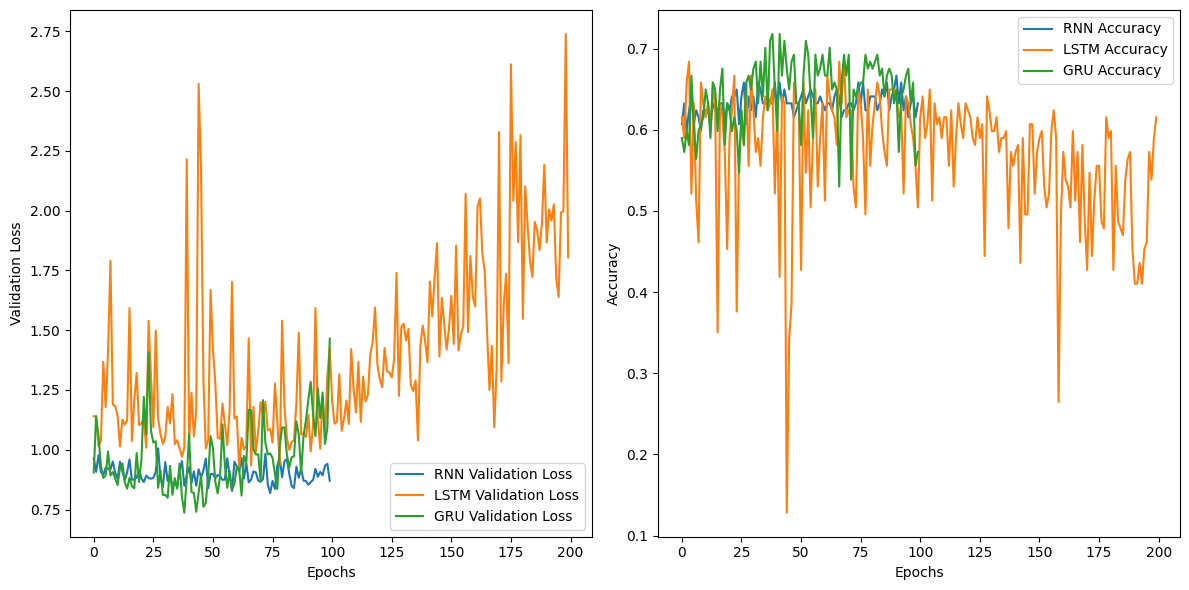

In [ ]:
plt.figure(figsize=(12, 6))

# Validation Loss
plt.subplot(1, 2, 1)
plt.plot(best_rnn.history['val_loss'], label='RNN Validation Loss')
plt.plot(history.history['val_loss'], label='LSTM Validation Loss')
plt.plot(best_Gru.history['val_loss'], label='GRU Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(best_rnn.history['val_accuracy'], label='RNN Accuracy')
plt.plot(history.history['val_accuracy'], label='LSTM Accuracy')
plt.plot(best_Gru.history['val_accuracy'], label='GRU Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
print("RNN MODEL")
print(best_rnn_model.summary())
print("GRU MODEL")
print(best_gru_model.summary())
print("LSTM MODEL")
print(best_model.summary())

RNN MODEL
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 167, 128)          16640     
                                                                 
 dropout (Dropout)           (None, 167, 128)          0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 192)               61632     
                                                                 
 dropout_1 (Dropout)         (None, 192)               0         
                                                                 
 dense (Dense)               (None, 4)                 772       
                                                                 
Total params: 79044 (308.77 KB)
Trainable params: 79044 (308.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
GRU

In [ ]:
import pandas as pd


data = {
    'Model': ['RNN', 'LSTM', 'GRU'],
    'Training Accuracy': [
        best_rnn.history['accuracy'][-1],
        history.history['accuracy'][-1],
        best_Gru.history['accuracy'][-1]
    ],
    'Validation Accuracy': [
        best_rnn.history['val_accuracy'][-1],
        history.history['val_accuracy'][-1],
        best_Gru.history['val_accuracy'][-1]
    ],
    'Training Loss': [
        best_rnn.history['loss'][-1],
        history.history['loss'][-1],
        best_Gru.history['loss'][-1]
    ],
    'Validation Loss': [
        best_rnn.history['val_loss'][-1],
        history.history['val_loss'][-1],
        best_Gru.history['val_loss'][-1]
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the table
print(df)

  Model  Training Accuracy  Validation Accuracy  Training Loss  \
0   RNN           0.758547             0.632479       0.612859   
1  LSTM           0.858974             0.615385       0.418870   
2   GRU           0.805556             0.572650       0.468543   

   Validation Loss  
0         0.870482  
1         1.804460  
2         1.464430  
